# ***Q1. Problem Statement: Logistic Regression*** 
**Here given a categorical dataset – “Heart_Disease.csv.” Load the dataset into
a DataFrame. Considering the “TenYearCHD” column as the target variable,
perform the following tasks:**
1. Explore the “Heart_Disease.csv” dataset, identify the null values and fill them
with the mean value of their respective columns
2. Split the data into test and train parts using train_test_split()
function in 80:20 ratio (80% train, 20% test)
3. Perform scaling of numeric data using the StandardScaler() function
4. Build a Logistic regression model using the test dataset and test the model
using the test dataset
5. Print the classification report of the model
6. Calculate the confusion matrix and plot the same using a heatmap
7. Calculate and print the accuracy score of the model
8. Print the decision boundary for θ = 0, θ = 1 and 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics

#### ***1. Explore the “Heart_Disease.csv” dataset, identify the null values and fill themwith the mean value of their respective columns***

In [4]:
df = pd.read_csv('Heart_Disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
#imputer = imputer.fit(df[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']])
#s_imputer = imputer.transform(df[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']])

In [10]:
#fillna = df[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']].fillna(df[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']].mean())

In [11]:
df = df.fillna(df.mean())

#### ***2. Split the data into test and train parts using train_test_split() function in 80:20 ratio (80% train, 20% test)***

In [12]:
x = df.drop('TenYearCHD',axis = 1)
y = df.TenYearCHD

In [13]:
import sys

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=0)

print('After splitting the Data:-')
print('size of input train data:-',sys.getsizeof(x_train))
print('size of input test data:-',sys.getsizeof(x_test))
print('size of output train data:-',sys.getsizeof(y_train))
print('size of output test data:-',sys.getsizeof(y_test))

After splitting the Data:-
size of input train data:- 433936
size of input test data:- 108560
size of output train data:- 54256
size of output test data:- 13584


#### ***3. Perform scaling of numeric data using the StandardScaler() function***

In [14]:
sc = StandardScaler()
standard_xtrain = sc.fit_transform(x_train)
standard_xtest = sc.transform(x_test)

In [15]:
x_train = pd.DataFrame(standard_xtrain,columns = x.columns)
x_test = pd.DataFrame(standard_xtest,columns = x.columns)

#### ***4. Build a Logistic regression model using the test dataset and test the model using the test dataset***

In [16]:
lr = LogisticRegression()
lr.fit(standard_xtrain,y_train)

LogisticRegression()

In [17]:
y_pred=lr.predict(x_test)

#### ***5. Print the classification report of the model***

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



#### ***6. Calculate the confusion matrix and plot the same using a heatmap***

In [19]:
confusion_mat=confusion_matrix(y_test,y_pred)

In [20]:
confusion_mat

array([[708,   2],
       [129,   9]], dtype=int64)

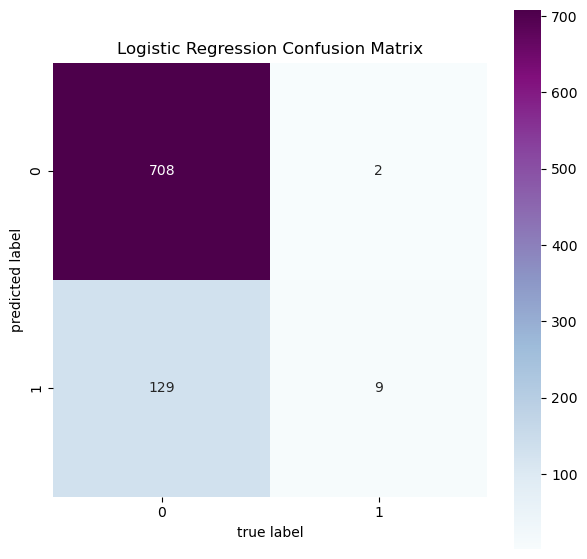

In [21]:
plt.figure(figsize=(7,7))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### ***7. Calculate and print the accuracy score of the model***


In [22]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.8455188679245284
accuracy: 85 %


#### ***8. Print the decision boundary for θ = 0, θ = 1 and 2***

In [23]:
print(lr.intercept_ )
print(lr.coef_ )

[-1.99450414]
[[ 0.21635451  0.52284324 -0.00373038  0.01763908  0.27002551  0.01692892
   0.08452846  0.16742972  0.054612    0.0912552   0.29073846 -0.09032936
   0.03575889 -0.01982821  0.12616453]]
